In [1]:
from utilities import *

%load_ext autoreload

%autoreload 2

In [16]:
# chargement d'un jeu de 40 donnees
data = load_train(400,begin=0.5,duration=2)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [17]:
# split de donnees
X,y = convert_df(data)

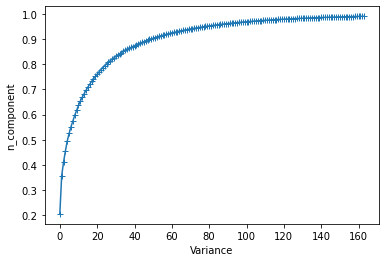

In [50]:
plot_cumexpvar(X,0.99)

In [19]:
C = 2
degree = 6

In [20]:
#plot_score_components(X_train, y_train, X_valid, y_valid,C,degree,11,500,50)

In [21]:
#plot_score_components(X_train, y_train, X_valid, y_valid,C,degree,100,220,1)

In [51]:
clf = sklearn.svm.SVC(C=C,kernel="poly",degree=degree,coef0=1)
train_score = []
valid_score = []
nComp_range = np.arange(130,180,1)
for i in tqdm(nComp_range):
    preProc = sklearn.decomposition.PCA(i)
    preProc.fit(X)

    X_Transformed = preProc.transform(X)
    #X_valid_Transformed = preProc.transform(X_valid)

    #clf.fit(X_train_Transformed, y_train)
    #clf.fit(X_valid_Transformed,y_valid)

    #trainscore = clf.score(X_train_Transformed,y_train)
    #validscore = clf.score(X_valid_Transformed,y_valid)

    cv_results = cross_validate(clf, X_Transformed, y, cv=10,return_estimator=True,return_train_score=True)
    sorted(cv_results.keys())
    train_score.append(np.max(cv_results['train_score']))
    valid_score.append(np.max(cv_results['test_score']))

  0%|          | 0/50 [00:00<?, ?it/s]

In [52]:
bestIndex = np.argmax(valid_score)
nComp_range[bestIndex]

140

(0.5, 1.0)

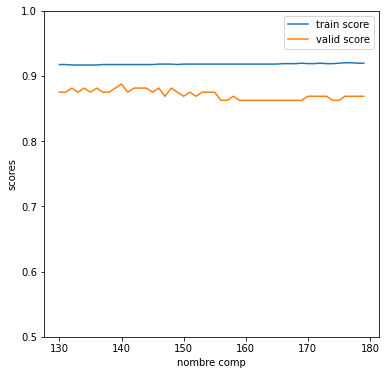

In [53]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.plot(nComp_range, train_score, label= "train score")
ax.plot(nComp_range, valid_score, label= "valid score")
ax.set_xlabel("nombre comp")
ax.set_ylabel("scores")
ax.legend()
ax.set_ylim([0.5,1])

In [57]:
preProc = sklearn.decomposition.PCA(140)
preProc.fit(X)
X_Transformed = preProc.transform(X)
#X_valid_Transformed = preProc.transform(X_valid)

#clf.fit(X_train_Transformed, y_train)
#clf.fit(X_valid_Transformed,y_valid)
    #trainscore = clf.score(X_train_Transformed,y_train)
    #validscore = clf.score(X_valid_Transformed,y_valid)

cv_results = cross_validate(clf, X_Transformed, y, cv=10,return_estimator=True,return_train_score=True)
sorted(cv_results.keys())
best_svc = cv_results["estimator"][8]

In [56]:
np.argmax(cv_results["test_score"])

8

In [78]:
data_test = load_test(20,begin=1,duration=1.5)

  0%|          | 0/80 [00:00<?, ?it/s]

In [79]:
X_test, y_test = load_subsets_test(data_test)

In [80]:
X_test_Transformed = preProc.transform(X_test)

In [81]:
#clf.predict(X_test_Transformed)

In [82]:
best_svc.score(X_test_Transformed,y_test)

0.525